In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import csv
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from plotnine import *

## Read in expression matrix

mRNA-Seq from 10 individual C.elegans worms. Processed with CEL-Seq-pipeline (https://github.com/eco32i/CEL-Seq-pipeline)

In [3]:
!head ../data/CE_exp.umi.tab

In [4]:
!tail ../data/CE_exp.umi.tab

## Expression matrix contains read counts in genes. Columns are worms rows are genes.

In [5]:
ce = pd.read_csv('../data/CE_exp.umi.tab', sep='\t', skipfooter=5)
ce

/home/ilya/.venv/pydata3/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,#Sample:,CE_1.genome,CE_10.genome,CE_2.genome,CE_3.genome,CE_4.genome,CE_5.genome,CE_6.genome,CE_7.genome,CE_8.genome,CE_9.genome
0,2L52.1,0,0,1,0,0,0,1,0,0,1
1,2L52.2,0,0,0,0,0,0,0,0,0,0
2,2RSSE.1,0,0,0,0,0,0,0,0,0,0
3,2RSSE.2,0,0,0,0,0,0,0,0,0,0
4,2RSSE.3,0,0,0,0,0,0,0,0,0,0
5,2RSSE.4,0,0,0,0,0,0,0,0,0,0
6,2RSSE.5,0,0,0,0,0,0,0,0,0,0
7,2RSSE.6,0,0,0,0,0,0,0,0,0,0
8,2RSSE.7,0,0,0,0,0,0,0,0,0,0
9,2RSSE.8,0,0,0,0,0,0,0,0,0,0


PCA is sensitive to variable scaling. Therefore before performing the analysis we need to normalize the data. `StandardScaler` will transform every variable to unti space (mean 0, variance 1). Note also that `sklearn` expects columns to be genes (features) and rows to be worms (samples, or observations). Therefore we transpose the matrix before doing anything.

In [ ]:
#ce = ce.ix[ce.ix[:,1:].mean(axis=1)>500,:]

In [6]:
X_std = StandardScaler().fit_transform(ce.ix[:,1:].values.T)
X_std

/home/ilya/.venv/pydata3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ilya/.venv/pydata3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.65465367,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.65465367,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.52752523,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [-0.65465367,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.65465367,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.52752523,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [7]:
sklearn_pca = sklearnPCA(n_components=10)
Y_sklearn = sklearn_pca.fit_transform(X_std)
Y_sklearn

array([[ -1.07546376e+02,   4.63864340e+00,  -8.96436965e+00,
          1.74959571e+00,  -5.84279506e+00,   3.64185213e+01,
         -4.97689548e+01,   4.14305419e+01,   9.12143621e+00,
         -1.64410248e-13],
       [  7.77641744e+01,  -8.29901734e+01,  -2.03120362e+01,
          6.66481269e+01,   5.10038587e+00,   8.95508016e+00,
          3.46475822e+00,   1.66973996e+00,   7.01552270e-01,
         -1.64410248e-13],
       [ -3.36179150e+01,   9.16017706e+00,   1.63654260e+01,
          2.03123487e+01,   4.29966650e+00,  -7.75515474e+01,
         -3.25176584e+01,  -1.09572684e+01,   1.05471985e+01,
         -1.64410248e-13],
       [  3.76400268e+01,  -1.24952448e+01,  -2.99456479e+01,
         -5.82751506e+01,   7.81762978e+01,  -5.50576813e+00,
          4.93608408e+00,   6.96783833e+00,   1.97547133e+00,
         -1.64410248e-13],
       [ -8.43712970e+01,   7.85590075e+00,   2.77664314e+00,
          8.37739348e+00,  -3.92919991e-01,  -4.24752998e+00,
          1.90791736e+01

`Y_sklearn` is a `numpy` array of the shape `(num_samples, n_components)` where original `X` data is projected onto the number of extracted principal components

## Plot explained variance

In [8]:
sklearn_pca.explained_variance_

array([  7.11281203e+03,   1.54625101e+03,   1.39685295e+03,
         1.35865661e+03,   1.12790529e+03,   9.19430967e+02,
         7.58026841e+02,   7.05313255e+02,   6.59751045e+02,
         2.70307297e-26])

In [9]:
sklearn_pca.explained_variance_ratio_

array([  4.56388324e-01,   9.92140529e-02,   8.96280367e-02,
         8.71771966e-02,   7.23712087e-02,   5.89946081e-02,
         4.86382317e-02,   4.52559034e-02,   4.23324379e-02,
         1.73440678e-30])

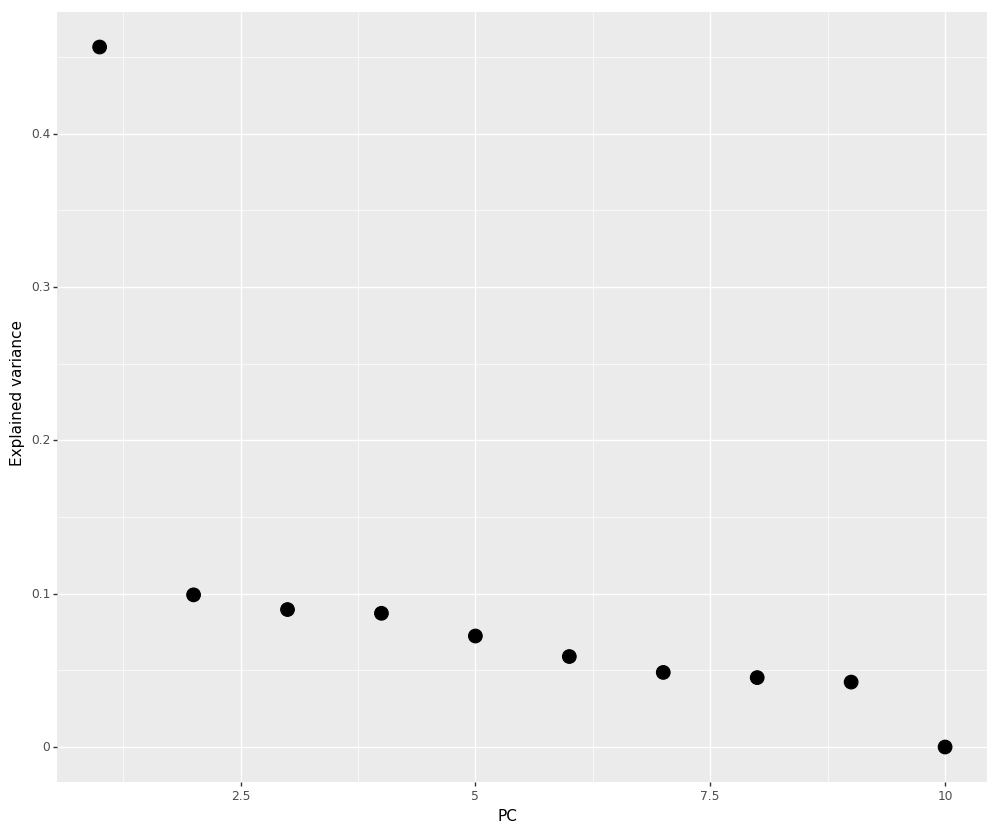

<ggplot: (-9223363244110839622)>

In [10]:
vdf = pd.DataFrame()
vdf['PC'] = [(i+1) for i,x in enumerate(sklearn_pca.explained_variance_ratio_)]
vdf['var'] = sklearn_pca.explained_variance_ratio_

(ggplot(vdf, aes(x='PC', y='var'))
    + geom_point(size=5)
    + ylab('Explained variance')
    + theme(figure_size=(12,10))
)

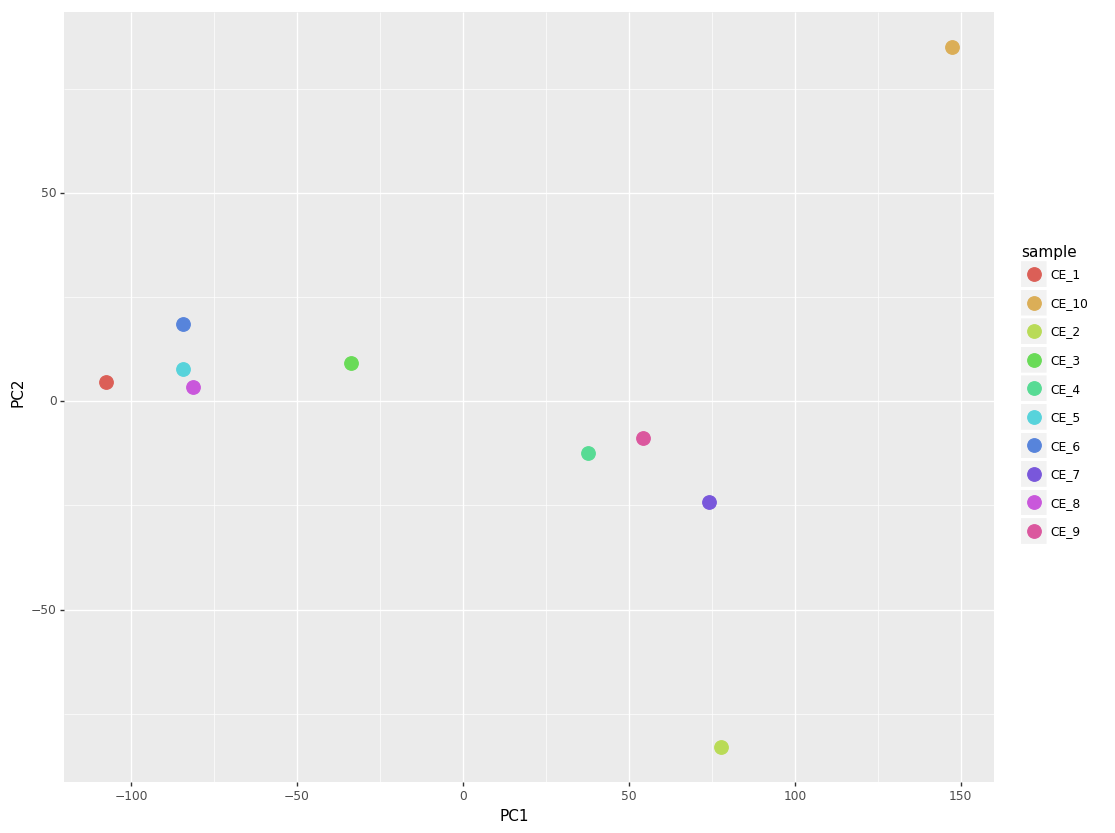

<ggplot: (-9223363244110838654)>

In [11]:
pca_df = pd.DataFrame()
pca_df['sample'] = ['CE_%i' % (x+1) for x in range(10)]
pca_df['PC1'] = Y_sklearn[:,0]
pca_df['PC2'] = Y_sklearn[:,1]

(ggplot(pca_df, aes(x='PC1', y='PC2', color='sample'))
    + geom_point(size=5)
    + theme(figure_size=(12,10))
)

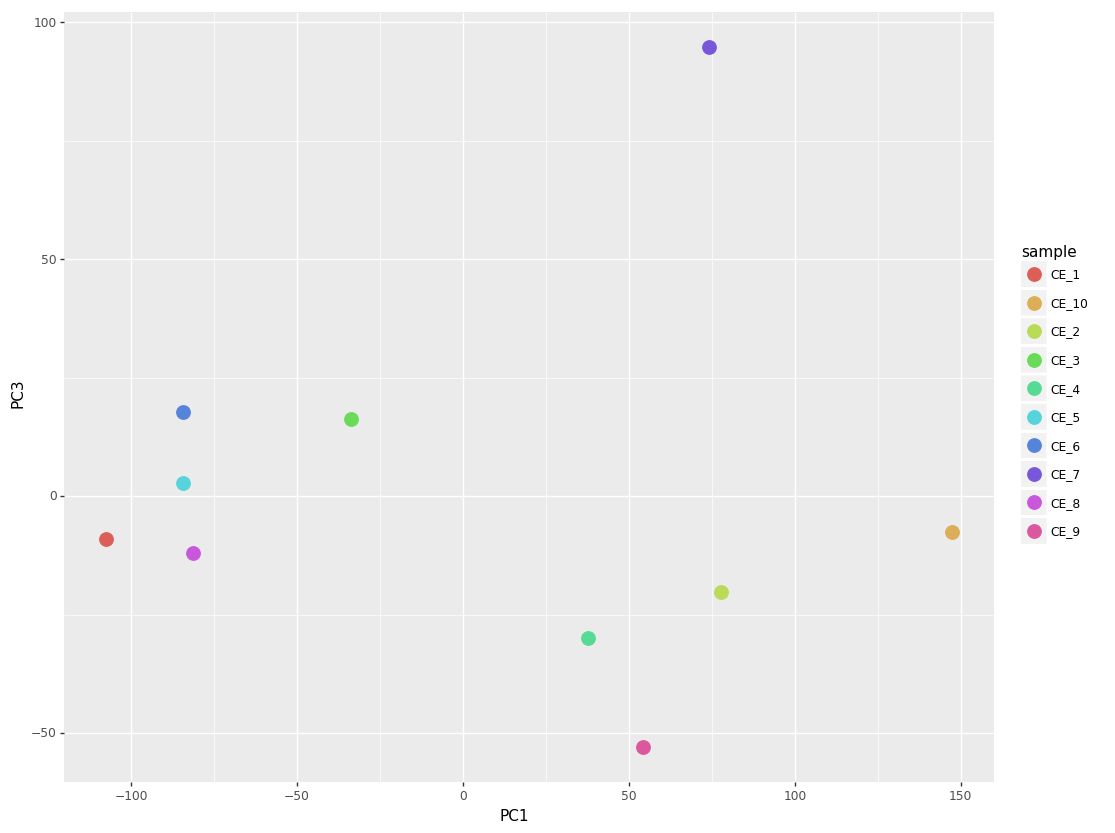

<ggplot: (-9223363244110848796)>

In [13]:
pca_df = pd.DataFrame()
pca_df['sample'] = ['CE_%i' % (x+1) for x in range(10)]
pca_df['PC1'] = Y_sklearn[:,0]
pca_df['PC3'] = Y_sklearn[:,2]

(ggplot(pca_df, aes(x='PC1', y='PC3', color='sample'))
    + geom_point(size=5)
    + theme(figure_size=(12,10))
)

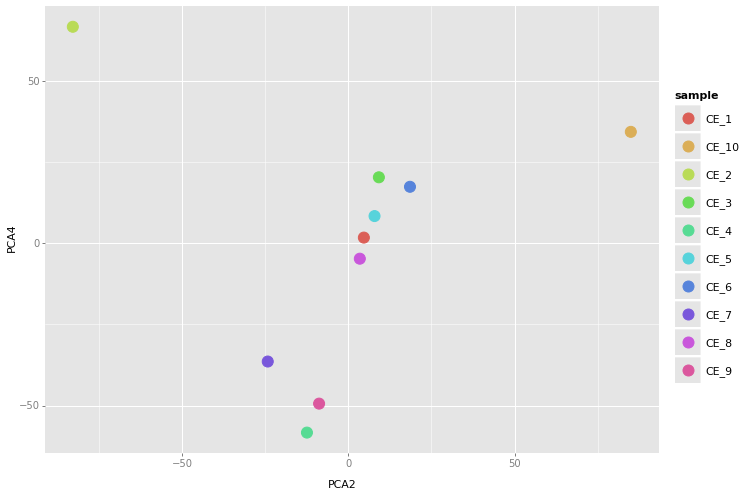

<ggplot: (-9223363276523880974)>


In [20]:
pca_df = pd.DataFrame()
pca_df['sample'] = ['CE_%i' % (x+1) for x in range(10)]
pca_df['PCA2'] = Y_sklearn[:,1]
pca_df['PCA4'] = Y_sklearn[:,3]

g = ggplot(pca_df, aes(x='PCA2', y='PCA4', color='sample')) \
    + geom_point(size=10)
print(g)